In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./inputs/SIIM_ACR_input.csv')
df = df[df.Pneumothorax==1]
df = df.reset_index(drop=True)
df

,PID,ImageId,DicomPath,Pneumothorax,ImagePath
0,2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...
1,3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...
2,7,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...
3,10,1.2.276.0.7230010.3.1.4.8323329.4440.151787518...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.4440.151787518...
4,11,1.2.276.0.7230010.3.1.4.8323329.4982.151787518...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.4982.151787518...
...,...,...,...,...,...
2374,11570,1.2.276.0.7230010.3.1.4.8323329.3335.151787517...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.3335.151787517...
2375,11571,1.2.276.0.7230010.3.1.4.8323329.1805.151787516...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.1805.151787516...
2376,11572,1.2.276.0.7230010.3.1.4.8323329.32260.15178751...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.32260.15178751...
2377,11575,1.2.276.0.7230010.3.1.4.8323329.32459.15178751...,/dicom-images-train/1.2.276.0.7230010.3.1.2.83...,1,1.2.276.0.7230010.3.1.4.8323329.32459.15178751...


In [3]:
#img_base_path = '/mnt/NAS3/datasets/external/SIIM_ACR_Pneumothorax/train_png/'  # Base path for images
msk_base_path = '/mnt/NAS3/datasets/external/SIIM_ACR_Pneumothorax/train_msk/'  # Base path for masks

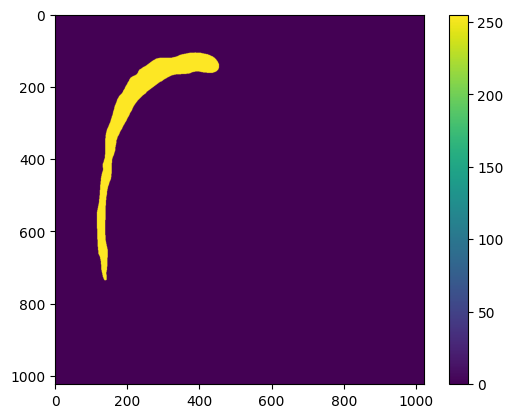

In [4]:
msk_arr = np.array(Image.open(msk_base_path+df.ImagePath.iloc[2][:-4]+'_msk.png'))
plt.imshow(msk_arr)
plt.colorbar()

In [5]:
np.sum(msk_arr==255)*100/(msk_arr.shape[0]*msk_arr.shape[1])

2.7731895446777344

In [6]:
def calculate_ptx_pct(x):
    msk_base_path = '/mnt/NAS3/datasets/external/SIIM_ACR_Pneumothorax/train_msk/'    
    msk_arr = np.array(Image.open(msk_base_path+x[:-4]+'_msk.png'))
    return np.sum(msk_arr==255)*100/(msk_arr.shape[0]*msk_arr.shape[1])

In [7]:
df['Volume'] = df.ImagePath.apply(calculate_ptx_pct)

In [8]:
df = df[['ImagePath','Volume']].copy()
df['Volume Quartile'] = pd.qcut(df.Volume, 4, labels=['Q1','Q2','Q3','Q4'])

In [10]:
df.to_csv('./inputs/ptx_volume_pct.csv', index=False)